In [2]:
from src.utils import *
from src.postprocess import rmsSpacial

# Error analysis
Two type of erro analysis:
- Mean spacial error
- Amplitude and phase error

### Mean spacial error
 
$$Error = \dfrac{\int |p^{'}(x,t_{obs}) - p_a^{'}(x,t_{obs})|}{\int p_a^{'}(x,t_{obs})}$$

- Three windows of spacial error
- window 1: x = (-99.17, -32.3) - length = 66.87
- window 2: x = (-32.3, 33.93) - length = 66.23
- window 3: x = (33.93, 99.37) - length = 65.44


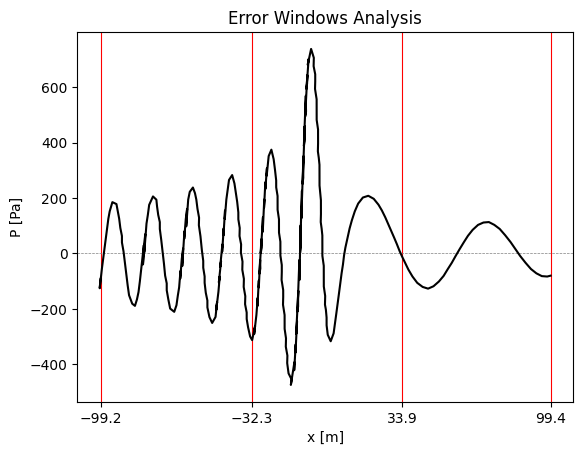

In [3]:
save = False
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
xa,pa = loadtxt(sol, unpack=True)
win = 3
window = (xa[-1]- xa[0])/win
pos = 0
ticks = [xa[0]]
for i in range(win):
    begin = pos
    pos   = xa.searchsorted(xa[0] + (i+1)*window)
    end   = pos 
    ticks.append(xa[end])

plt.axhline(0, color = 'gray', linestyle = '--', linewidth = 0.5)
plt.plot(xa,pa, 'k')

plt.title('Error Windows Analysis')
plt.xlabel('x [m]')
plt.ylabel('P [Pa]')

plt.xticks(ticks)
plt.grid(axis='x', color = 'r')
if save:
    plt.savefig(PATH_IMAGES.joinpath('windows.png'), format = 'png', dpi = 720)
plt.show()

# Time and Spacial schemes analysis
Time Schemes:
- Euler
- backward
- CrankNicolson

Spacial Schemes:   
- upwind 
- limitedLinear 
- linearUpwind

### CircMesh


-----Time Schemes-----
- backward: [4.221, 3.152, 1.23]%
- CrankNicolson: [4.233, 3.151, 1.224]%
- Euler: [4.476, 3.132, 1.148]%
-----Spacial Schemes-----
- upwind: [94.312, 30.091, 9.271]%
- limitedLinear: [10.863, 3.632, 1.496]%
- linearUpwind: [2.924, 2.622, 1.398]%


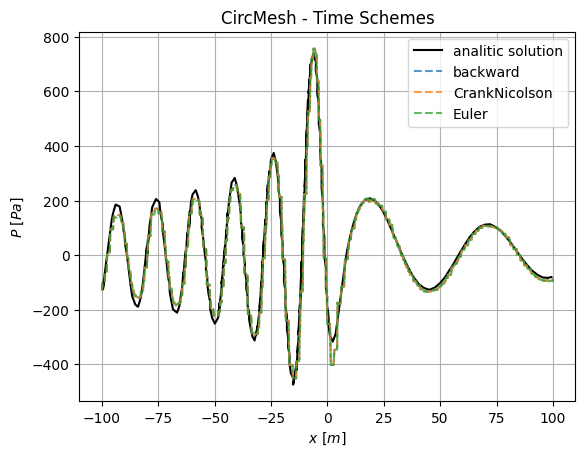

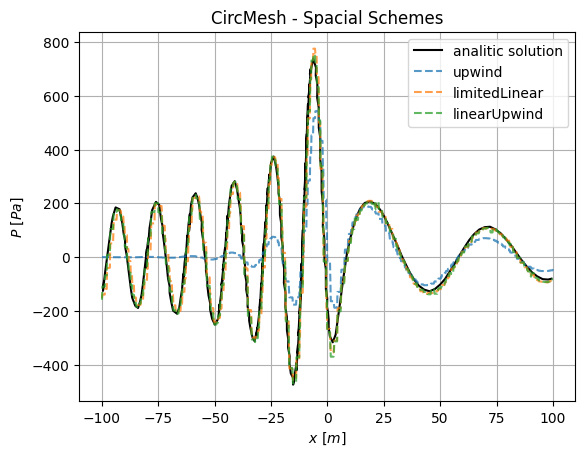

In [4]:
psimT = importData(case='circMesh', test='timeTest')
psimS = importData(case = 'circMesh', test='spacialTest')
dic   = {'Time Schemes':psimT, 'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')
    
plotSchemes(psimT, analitc=sol, title='CircMesh - Time Schemes', save=save)
plotSchemes(psimS, analitc=sol, title='CircMesh - Spacial Schemes', save=save)


### QuadMesh

-----Time Schemes-----
- backward: [34.114, 17.131, 103.821]%
- bdampingZone: [34.114, 17.131, 103.821]%
- CrankNicolson: [33.953, 17.032, 103.137]%
- Euler: [31.252, 15.392, 91.715]%
-----Spacial Schemes-----
- upwind: [93.092, 31.44, 12.325]%
- limitedLinear: [13.827, 4.574, 4.463]%
- linearUpwind: [73.092, 30.195, 221.802]%


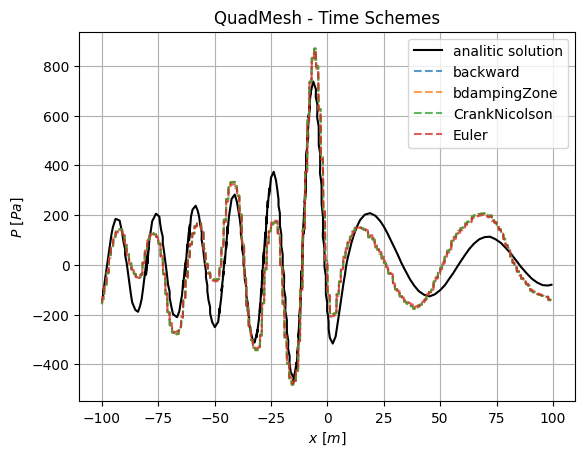

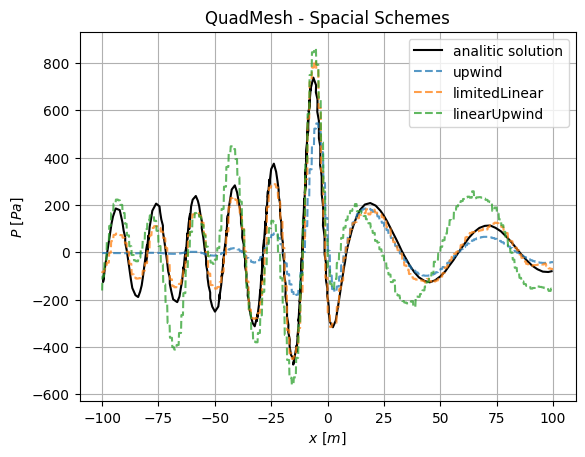

In [5]:
psimT = importData(case='quadMesh', test='timeTest')
psimS = importData(case = 'quadMesh', test='spacialTest')
dic   = {'Time Schemes':psimT, 'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')

plotSchemes(psimT, analitc=sol, title='QuadMesh - Time Schemes', save=save)
plotSchemes(psimS, analitc=sol, title='QuadMesh - Spacial Schemes', save=save)

#### QuadMesh with waveTransmissive boundary condition

##### 8 PPW

-----Spacial Schemes-----
- wt-linearUpwind: [7.652, 2.155, 1.475]%
- wt-limitedLinear: [7.652, 2.155, 1.475]%


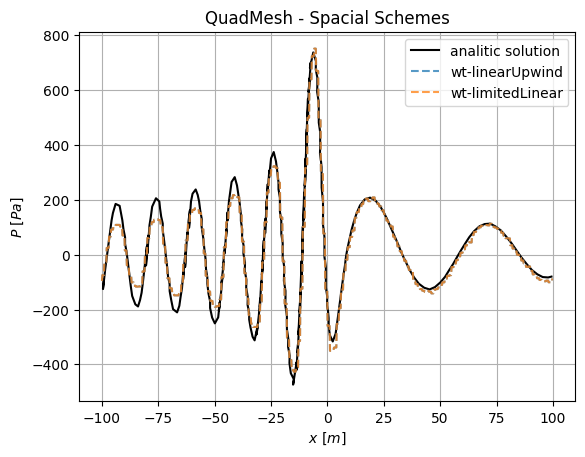

In [6]:
psimS = importData(case = 'quadMesh', test='waveTransmissiveTest')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')

plotSchemes(psimS, analitc=sol, title='QuadMesh - Spacial Schemes', save=save)

##### 16 PPW

-----Spacial Schemes-----
- wt-linearUpwind: [7.652, 2.155, 1.475]%
- wt-limitedLinear: [7.652, 2.155, 1.475]%
- 16ppw-limitedLinear: [1.533, 1.309, 1.311]%


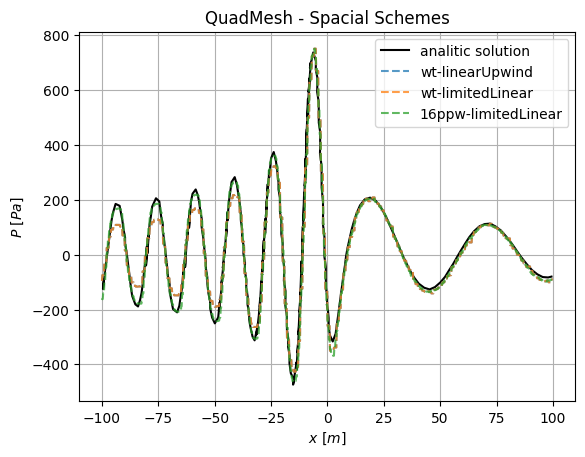

In [15]:
psimS = importData(case = 'quadMesh', test='waveTransmissiveTest')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')

plotSchemes(psimS, analitc=sol, title='QuadMesh - Spacial Schemes', save=save)

### newMesh0

-----Time Schemes-----
- backward: [6.18, 1.474, 2.195]%
- CrankNicolson: [6.101, 1.472, 2.195]%
- Euler: [6.329, 1.428, 2.07]%
-----Spacial Schemes-----
- limitedlLinearvanLeer: [6.18, 1.474, 2.195]%
- luvldz: [6.18, 1.474, 2.195]%
- luvanLeer: [6.18, 1.474, 2.195]%
- upwind: [73.289, 12.396, 7.44]%
- llvldz: [6.18, 1.474, 2.195]%
- limitedLinear: [9.744, 2.083, 3.081]%
- linearUpwind: [3.42, 1.397, 6.546]%


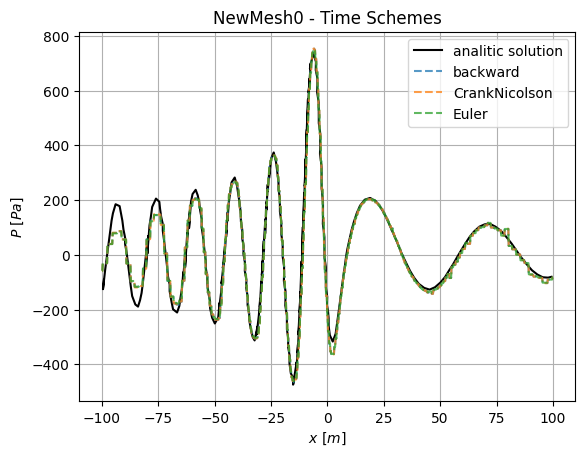

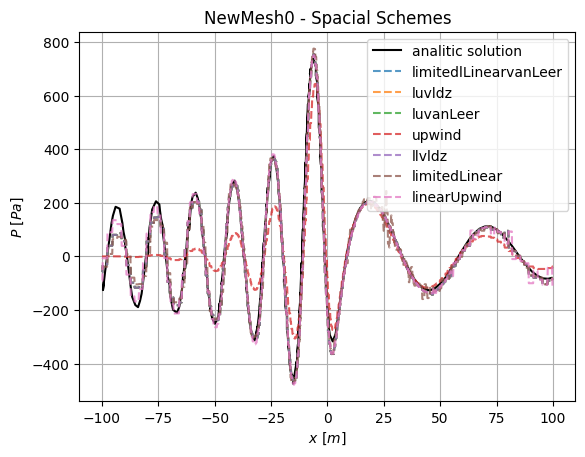

In [8]:
psimT = importData(case='newMesh0', test='timeTest')
psimS = importData(case = 'newMesh0', test='spacialTest')
dic   = {'Time Schemes':psimT, 'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemes(psimT, analitc=sol, title='NewMesh0 - Time Schemes', save=save)
plotSchemes(psimS, analitc=sol, title='NewMesh0 - Spacial Schemes', save=save)

### newMesh 1

-----Time Schemes-----
- backward: [2.959, 1.454, 1.4]%
- CrankNicolson: [2.931, 1.305, 1.402]%
- Euler: [2.836, 1.185, 1.341]%
-----Spacial Schemes-----
- llvanLeer: [2.959, 1.454, 1.4]%
- luvldz: [2.959, 1.454, 1.4]%
- luvanLeer: [2.959, 1.454, 1.4]%
- upwind: [52.057, 3.089, 4.046]%
- llvldz: [2.959, 1.454, 1.4]%
- limitedLinear: [4.357, 3.93, 8.538]%
- linearUpwind: [2.034, 1.22, 2.865]%


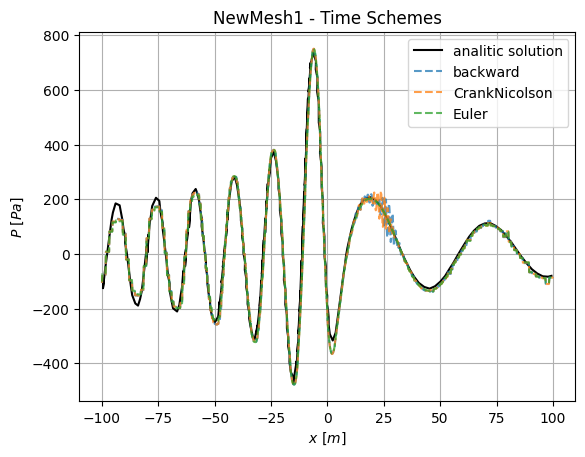

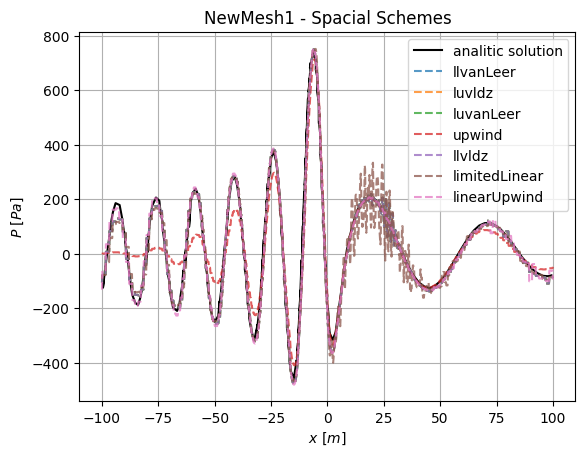

In [9]:
psimT = importData(case='newMesh1', test='timeTest')
psimS = importData(case = 'newMesh1', test='spacialTest')
dic   = {'Time Schemes':psimT, 'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemes(psimT, analitc=sol, title='NewMesh1 - Time Schemes', save=save)
plotSchemes(psimS, analitc=sol, title='NewMesh1 - Spacial Schemes', save=save)

# Fixed vanLeer for interpolation schemes

### newMesh 0

-----Spacial Schemes-----
- limitedLinear: [9.744, 2.083, 3.081]%


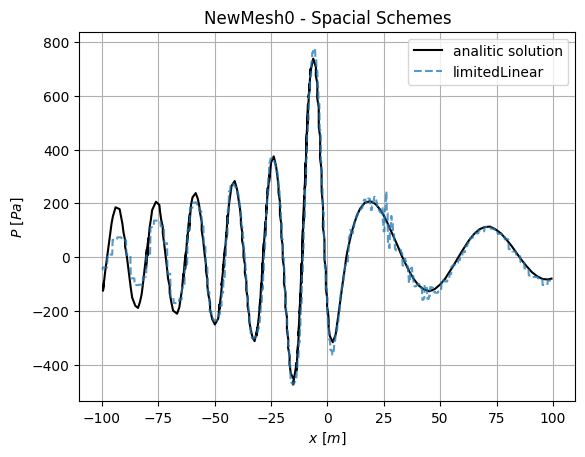

In [10]:
psimS = importData(case = 'newMesh0', test='spacialTest', keyword='limitedLinear')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemes(psimS, analitc=sol, title='NewMesh0 - Spacial Schemes', save=save)

### newMesh 1

-----Spacial Schemes-----
- llvanLeer: [2.959, 1.454, 1.4]%
- luvldz: [2.959, 1.454, 1.4]%
- luvanLeer: [2.959, 1.454, 1.4]%
- llvldz: [2.959, 1.454, 1.4]%


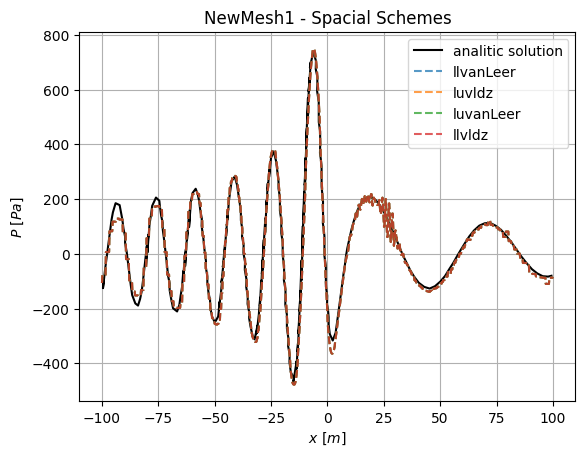

In [11]:
psimS = importData(case = 'newMesh1', test='spacialTest', keyword='l*v')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemes(psimS, analitc=sol, title='NewMesh1 - Spacial Schemes', save=save)

### newMesh 3

-----Spacial Schemes-----
- dz: [16.532, 2.348, 2.098]%
- luvldaz: [16.532, 2.348, 2.098]%
- llvldz: [16.532, 2.348, 2.098]%


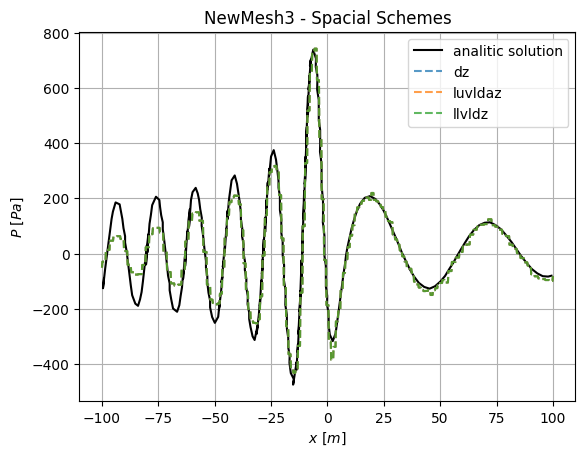

In [12]:
psimS = importData(case = 'newMesh3', test='spacialTest')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemes(psimS, analitc=sol, title='NewMesh3 - Spacial Schemes', save=save)

### NewMesh5

-----Spacial Schemes-----
- back50q100q: [75.525, 13.676, 1.932]%
- bll100q100q: [69.707, 13.697, 1.61]%
- back100q100q: [69.707, 13.697, 1.61]%
- blu100q100q: [69.707, 13.697, 1.61]%


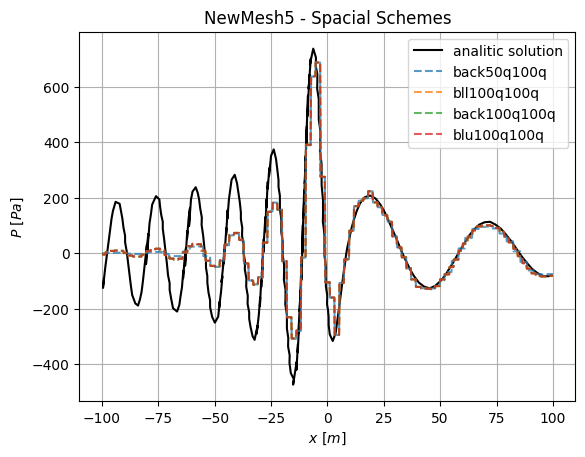

In [13]:
psimS = importData(case = 'newMesh5', test='spacialTest')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemes(psimS, analitc=sol, title='NewMesh5 - Spacial Schemes', save=save)

### NewMesh 6

-----Spacial Schemes-----
- limitedLinear: [8.873, 2.632, 1.32]%
- linearUpwind: [8.93, 2.635, 1.371]%
- vanLeer: [8.873, 2.632, 1.32]%


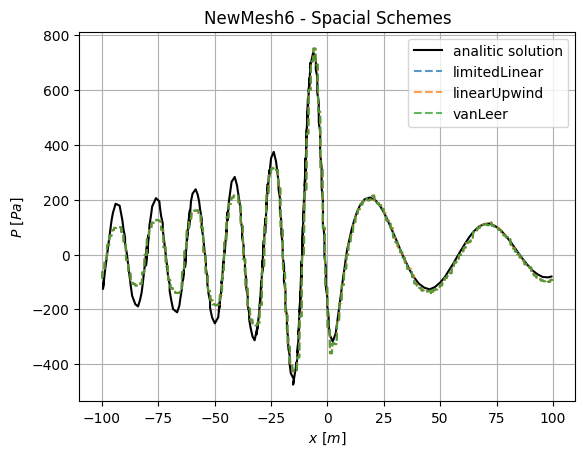

In [14]:
psimS = importData(case = 'newMesh6', test='spacialTest')
dic   = {'Spacial Schemes':psimS}

for type in dic:
    print(5*'-' + f'{type}' + 5*'-')
    for scheme in dic[type]:
        rms =  rmsSpacial((xa,pa), dic[type][scheme], windows=win)
        print(f'- {scheme}: {[round(i*100,3) for i in rms]}%')


plotSchemes(psimS, analitc=sol, title='NewMesh6 - Spacial Schemes', save=save)